## Exploratory Data Analysis of Diabetes dataset

### Task Description as Provided
```
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).
Note: Please keep in mind that use of python is needed to showcase your skills and writing
```


### Objective of this Notebook
This notebook is an example of how to perform an EDA on a dataset with the goal of providing an example of clear and easy to understand python code. After following this notebook the reader will have an understanding of:
* How python can be used to perform EDA
* How markdown, codeblocks and code comments can be used to explain code.
* How a hypothesis driven approach to EDA can be helpful for understanding the value of data.




### Notebook Methodology

This notebook will guide the reader through the initial exploration of the dataset provided with the goal of establishing the suitability of the data to be used for further analysis. We will seek to understand the potentially useful features (columns) and gain trust in the suitability of this dataset as the basis of predictive analysis. We will follow the principle of EDA as set out by John Tukey in that we will seek to confirm the expected and show the unexpected. Ultimately we will seek to answer the questions:
1. Are there problems in the data that should be considered when using this dataset?
2. Is this dataset suitable for analysis of diabetes in patients?
3. Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?
4. How should we proceed with creating a predictive model? 

### Notebook Description and Outline
**Section 1**  
We will use the the first section to gain confidence in the dataset and ensure it is suitable for further analysis. We load the dataset and explore the size and shape of the data as well as understand the types of data each column contains. We start with the question: "Are there problems in the dataset that should be considered when using this dataset?". If so, such as unexpected or missing values, they will be identified and dealt with. We conclude this section by answering the second question: "Is this dataset suitable for analysis of diabetes in patients?"  
**Section 2**  
In the second section we will look deeper into the contents of the columns to help us answer the questions "Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?". To do this we will check the variability of the independent and dependent variables and look for correlation between the variables. This will allow us to identify potential features to be used in statistical models related that will allow us to understand the drivers of the independent variable.  
**Section 3**  
The final section will run a simple predictive model and summarize the findings and present potential next steps that could be taken and answer our final question of "How should we proceed with creating a predictive model?".

### Section 1: Understanding the Data

#### Section 1.1 Load and Review Data
We go into the EDA with the expectation that each column contains complete and valid data. We will inspect the columns and rows to find any violations of this and deal with the issues, either by removing, changing or ignoring the data until we are satisfied that we can have a positive answer to our question "Is this dataset suitable for analysis of diabetes in patients? Before we can do that we must be able to answer confidently the question: "Are there problems in the dataset that should be considered when using this dataset?"

In [1]:
# We will use pandas to explore the load, explore and manipulate the data. numpy will also be used at times. 
# Our first step is to import the required packages. 
import pandas as pd
import numpy as np

# To make statistics easier to read we set the default display properties to 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# We will create a function to load the data into a dataframe.
# This allows us to easily re-run this step whenever necessary in case of needing to revert to fresh data.

def load_diabetes_data(data="data/diabetes (1).csv", display_metadata=True):
    """
    Load diabetes data from a CSV file into a pandas DataFrame.
    Parameters: 
    - data (str): The path to the CSV file containing diabetes data.
    - display_meta_data (bool) : Should metadata be displayed
    Returns: a pandas DataFrame containing diabetes data from the csv file.

    """
    diabetes_df = pd.read_csv(data)
    if display_metadata:
        no_cols, no_rows = diabetes_df.shape
        print(f"Number of columns: {no_cols}")
        print(f"Number of rows: {no_rows}")
        print("Column Info:")
        diabetes_df.info()
        
    return diabetes_df



In [3]:
# We run the function with default parameters to load the data and display the metadata
diabetes_df = load_diabetes_data()

Number of columns: 768
Number of rows: 9
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             765 non-null    object 
 3   SkinThickness             764 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    object 
 7   Age                       768 non-null    int64  
 8   Outcome                   766 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 54.1+ KB


##### Initial understanding of data
In Section 1.1 we have loaded the data and reviewed the metadata. We see there are a small number of null values in the **Glucose**, **BloodPressure**, **SkinThinckness**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**, and **Outcome** columns.  
We will consider how to handle this in the data cleaning phase. Either by removing the lines or ignoring the columns.
Based on the metadata we see the data contains mainly numeric data along with two columns which are "object". This usually points to a column that contains mixed data types, missing data or problematic data.  
We note that the **BloodPressure** and **DiabetesPedigreeFunction** need to be cleaned to have a single data type rather than object.  This may solved while dealing with the null values.
Once we have cleaned the data we can continue to see if we can use the data further.

#### Section 1.2 Identify Problems in data


We will ready our data for inspection by cleaning null values and fixing data types.
As noted before **BloodPresure** and **DiabetesPedigreeFunction** are "object" data types. This can be caused by data not conforming to expectations. There were also null values identfied in many columns. We will display any problematic and null values in the dataset so we can decide how to clean them before moving on to further analysis in of the data.

In [4]:
# We display a sample of rows to understand the data inside the columns.
display(diabetes_df.head(10))
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72,35.00,0.00,33.60,0.627,50,1.00
1,1,85.00,66,29.00,0.00,26.60,0.351,31,0.00
2,8,183.00,64,0.00,0.00,23.30,0.672,32,1.00
3,1,89.00,66,23.00,94.00,28.10,0.167,21,0.00
4,0,137.00,40,35.00,168.00,43.10,2.288,33,1.00
5,5,116.00,74,0.00,0.00,25.60,0.201,30,0.00
6,3,78.00,50,32.00,88.00,31.00,0.248,26,1.00
7,10,115.00,0,0.00,0.00,35.30,0.134,29,0.00
8,2,197.00,70,45.00,543.00,30.50,0.158,53,1.00
9,8,125.00,96,0.00,0.00,0.00,0.232,54,1.00


Based on the results of the above we expect all the coumns to be numeric in some way. We can see which values of the BloodPressure and DiabetesPedigireeFunction columns are non-numeric. 
We should inspect the non conforming rows.

In [5]:
# Here we make a function that returns the rows that do not conform to a numeric datatype

def non_conform_rows(df, columns):
    """
    Return a new DataFrame containing rows that do not conform to numeric data types.

    Parameters:
    - df: The DataFrame to check for non-conforming rows.
    - columns (list): A list of column names to check for data type conformity.
    
    Returns:
    - non_conforming_df : A new DataFrame containing rows that do not conform to numeric data type.

    """
    non_conforming_rows = []
    
    # Create a list of dataframes each containing rows that do not conform to numeric data types for each column
    for column in columns:
        non_conforming_rows.append(df[pd.to_numeric(df[column], errors="coerce").isna()])
    
    # Concatenate the list of dataframes into a single dataframe
    non_conforming_df = pd.concat(non_conforming_rows) #, ignore_index=True
    
    # Drop duplicate rows
    non_conforming_df.drop_duplicates(inplace=True)
    
    return non_conforming_df

In [6]:
# We call our function with our dataframe and all columns in that dataframe and allow the output to be displayed so we can see what the issues look like
non_conform_rows(diabetes_df, diabetes_df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
207,5,NaN,104,0.00,0.00,37.70,0.151,52,1.00
163,2,100.00,NaN,23.00,0.00,29.70,0.368,21,0.00
178,5,143.00,NaN,0.00,0.00,45.00,0.19,47,NaN
285,7,136.00,NaN,26.00,135.00,26.00,0.647,51,0.00
324,2,112.00,missed value,32.00,0.00,35.70,0.148,21,0.00
152,9,156.00,86,NaN,155.00,34.30,1.189,42,1.00
166,3,148.00,66,NaN,0.00,32.50,0.256,22,0.00
172,2,87.00,0,NaN,0.00,28.90,0.773,25,0.00
277,0,104.00,64,NaN,116.00,27.80,0.454,23,0.00
187,1,128.00,98,41.00,NaN,32.00,1.321,33,1.00


In [7]:
# We can check what percentage of our data is affected by counting rows that do not conform and total rows in the df
count_non_conforming_rows = len(non_conform_rows(diabetes_df, diabetes_df.columns))
total_rows =  len(diabetes_df)    
# calculate the share of bad rows and display the values using an f string
percentage_null = 100 * count_non_conforming_rows / total_rows
print(f"{count_non_conforming_rows} rows with non-conforming values")
print(f"{percentage_null:.2f} % of rows have non-conforming values:")

16 rows with non-conforming values
2.08 % of rows have non-conforming values:


#### 1.3 Removing Missing Values
Based on the above value that around 2% of rows are problematic at this point, we can remove them from our dataset and convert the object columns to specific data types. Based on the visual review of the data, **BloodPressure** should be an Integer and **DiabetesPedigreeFunction** should be a float. We will create a function that does those steps.


In [8]:
# Create a new function that returns a dataframe containing only conforming rows and corrected datatypes of given columns.
def conform_rows(df, columns, dtype_mapping={"BloodPressure": "int64", "DiabetesPedigreeFunction": "float64"}):
    """
    Return a new DataFrame containing only rows where data conforms to numeric data types.

    Parameters:
    - df: The DataFrame to check for non-conforming rows.
    - columns (list): A list of column names to check for data type conformity.
    - dtype_mapping (dict): dictionary mapping column names to datatypes that should be changed.
    
    Returns:
    - conforming_df (pandas.DataFrame): A new DataFrame containing rows that conform to numeric data type.

    """
    # Check each column and create mask of true / false value where there are conforming / non-conforming values
    
    for column in columns:
        conforming_mask = pd.to_numeric(df[column], errors="coerce").notna()
        # filter out non-conforming rows using the mask
        df = df[conforming_mask]
    
    #apply the dtype_mapping to the dataframe
    if dtype_mapping:
        df = df.astype(dtype_mapping)    

    return df


In [9]:
# call the cleaning function and assign to a new df
diabetes_df_clean = conform_rows(diabetes_df, diabetes_df.columns)
# Check the info of the new df to see if the changes have been applied 
diabetes_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    float64
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    float64
 4   Insulin                   752 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 58.8 KB


We see that we have 752 remaining non-null values in all columns and the columns are all numeric types.

#### Section 1.4 Finding outliers and miscoded values inside the data
We will use our existing knowledge of the dataset based on the column headers and external help to understand what the range of expected values should be. 
We will then use this to identify outliers and missing values.

In [10]:
# Check the descriptive statistics of the dataframe to see if there are any obvious issues
diabetes_df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00
mean,3.86,"13,417.10",69.13,20.52,79.80,32.00,0.47,33.21,0.35
std,3.38,"364,621.61",19.27,16.01,115.75,7.92,0.33,11.68,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,27.00,32.05,0.37,29.00,0.00
75%,6.00,140.00,80.00,32.00,126.25,36.60,0.62,40.25,1.00
max,17.00,"9,999,000.00",122.00,99.00,846.00,67.10,2.42,81.00,1.00


#### Explaination of Columns
Based on the above and a available sources in the internet we can make some assumptions about the meaning of each column.
Each row in the data set represents information on one individual patient.
- **Pregnancies** - The number of pregnancies the patient has had in their lifetime.
- **Glucose** - The patient's measured glucose level.
- **BloodPressure** - The patient's measured blood pressure.
- **SkinThickness** - The patient's measured Tricep skinfold thickness in mm.
- **Insulin** -   The patient's measured insulin level.
- **BMI** -   The patient's calculated body mass index based on height and weight measurements.
- **DiabetesPedigreeFunction** - a function which scores likelihood of diabetes based on family history
- **Age** - The patient's age in years.
- **Outcome** - Whether the patient has diabetes or not (1 for yes, 0 for no)

There are  values of **0.00** in columns where this would not be expected, such as **BloodPressure** and there is at least one very high value such of 9999000 for Glucose. These should be investigated to see if they need to be excluded, replaced or ignored on the basis that they are mis-coded and implausible. We will create histograms to see the spread of data and determine visually if there are outliers in any column.

In [11]:
# We will use the matplotlib and seaborn libraries to create plots of the data. First we import these packages.
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df=diabetes_df_clean, columns=diabetes_df_clean.columns):
    """
    Plot histograms for the 9 columns in the dataframe
    Parameters:
    - df: The DataFrame to plot the histograms for.
    returns:
    - None, displays a 3 by 3 grid of histograms
    """

    # create the frame to hold the subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    # loop through the columns, plotting the histogram and use some clever math to place the axes object it in the correct subplot.
    for i, column in enumerate(columns):
        sns.histplot(data=diabetes_df_clean, x=column, bins=10, ax=axes[i // 3, i % 3])


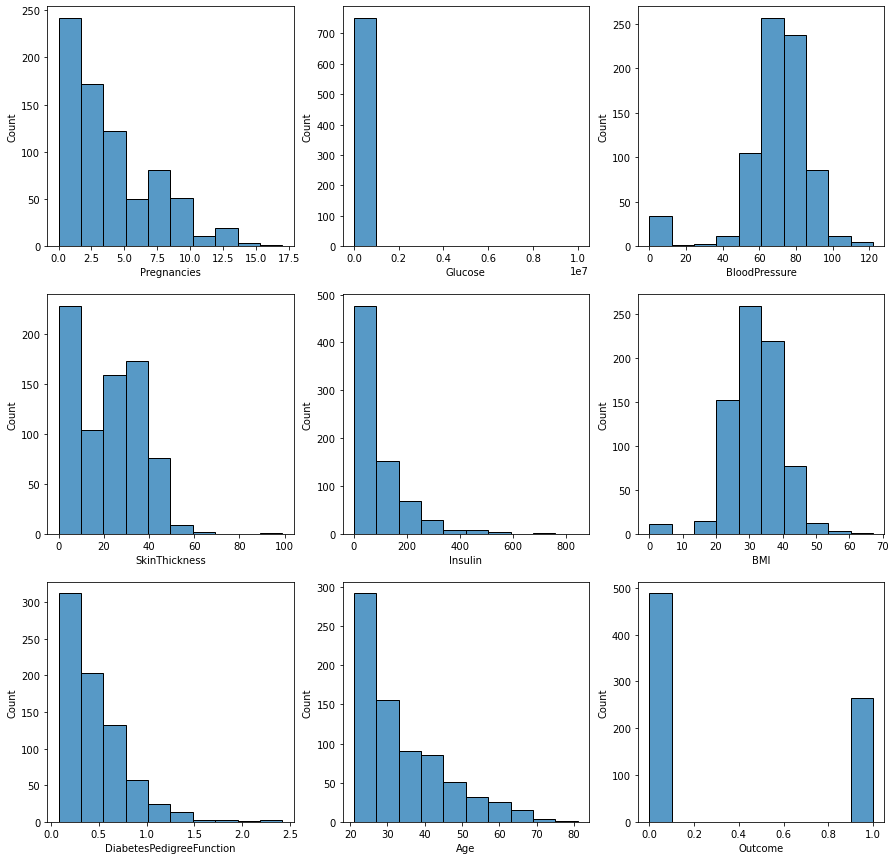

In [12]:
# Call the function with the default parameters
plot_histograms()

#### 1.5 Replacing Mis-coded Values
The above charts show us that the only major issue with outliers appears to come from gluclose where we have seen the maximum value of 9999000. We will replace values above 1000 with 0 and deal with them along with the other 0 values we will fix in the next step.

In [13]:
# We create a cleaning function for the outliers
# in this case we have a single outlier so we will replace all values of the glucose column that are above 1000 with 0 using a lambda function
# In the event of more outliers being found we can edpand the function

def clean_outliers(df=diabetes_df_clean):
    df["Glucose"] = df["Glucose"].apply(lambda x: x == 0 if x > 1000 else x)
    return df

In [14]:
# call the function
diabetes_df_clean = clean_outliers()

In [15]:
# We will count the rows that contain 0 values so we can establish the columns that have erroneous 0 values.
for column in diabetes_df_clean.columns:
    zeros = len(diabetes_df_clean[diabetes_df_clean[column] == 0])
    print(f"{zeros} rows with 0 values in {column}")

109 rows with 0 values in Pregnancies
6 rows with 0 values in Glucose
34 rows with 0 values in BloodPressure
224 rows with 0 values in SkinThickness
367 rows with 0 values in Insulin
11 rows with 0 values in BMI
0 rows with 0 values in DiabetesPedigreeFunction
0 rows with 0 values in Age
488 rows with 0 values in Outcome


Looking at the above and based on a basic understanding of the dataset we could expect that it would be reasonable to have 0 values in the columns, **Pregnacies** and **Outcomes**. However, it is not reasonable to have 0 values in the other columns. 

In [16]:
# we will create a function that identifies rows where the value is 0 and replaces the 0 with the mean of the column
def mean_fill(df="diabetes_df_clean", columns=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"], suffix="_clean"):
    """
    For the given columns in the given dataframe, create a new column that has 0 values replaced
    with the mean of the given column (excluding zero values), in other cases the existing value is maintained.

    Parameters:
    - df: The DataFrame that contains columns with erroneous 0 values.
    - columns (list): The names of the columns to replace 0 values with the mean of the column.
    - suffix (str): The suffix to append to the column name to create a new column with the mean values. If None, data will be overwritten.

    Returns:
    - df (pandas.DataFrame): A new DataFrame where 0 values have been replaced with mean values.

    """
    # handle the None suffix parameter
    if suffix == None:
        suffix = ""
    
    # loop through the columns
    for column in columns:
        # calculate the mean of the column excluding 0 values
        col_mean = df[df[column] != 0][column].mean()
        # replace zero values with mean values in a new column if suffix is provided, otherwise overwrite the existing column
        df[column + suffix] = df[column].apply(lambda x: col_mean if x == 0 else x)
    return df
    

In [17]:
# run the function for each column that contains 0 we want to fix

diabetes_df_clean = mean_fill(diabetes_df_clean, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"], suffix="_clean")

# display the descriptive statistics of the new df with columns in alphabetical order
diabetes_df_clean[sorted(diabetes_df_clean.columns)].describe()


,Age,BMI,BMI_clean,BloodPressure,BloodPressure_clean,DiabetesPedigreeFunction,Glucose_clean,Insulin,Insulin_clean,Outcome,Pregnancies,SkinThickness,SkinThickness_clean
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00
mean,33.21,32.00,32.48,69.13,72.41,0.47,121.53,79.80,155.86,0.35,3.86,20.52,29.22
std,11.68,7.92,6.90,19.27,12.02,0.33,30.51,115.75,85.56,0.48,3.38,16.01,8.81
min,21.00,0.00,18.20,0.00,24.00,0.08,44.00,0.00,14.00,0.00,0.00,0.00,7.00
25%,24.00,27.30,27.50,63.50,64.00,0.24,99.00,0.00,121.50,0.00,1.00,0.00,25.00
50%,29.00,32.05,32.40,72.00,72.00,0.37,117.00,27.00,155.86,0.00,3.00,23.00,29.22
75%,40.25,36.60,36.60,80.00,80.00,0.62,140.00,126.25,155.86,1.00,6.00,32.00,32.00
max,81.00,67.10,67.10,122.00,122.00,2.42,199.00,846.00,846.00,1.00,17.00,99.00,99.00


We can see from comparing the originial columns to the new clean mean filled columns that the mean has changed and the minimum value has increased. The Glucose column values also look reasonable. 
We will run our histogram function again to see how the distribution of the data has changed.


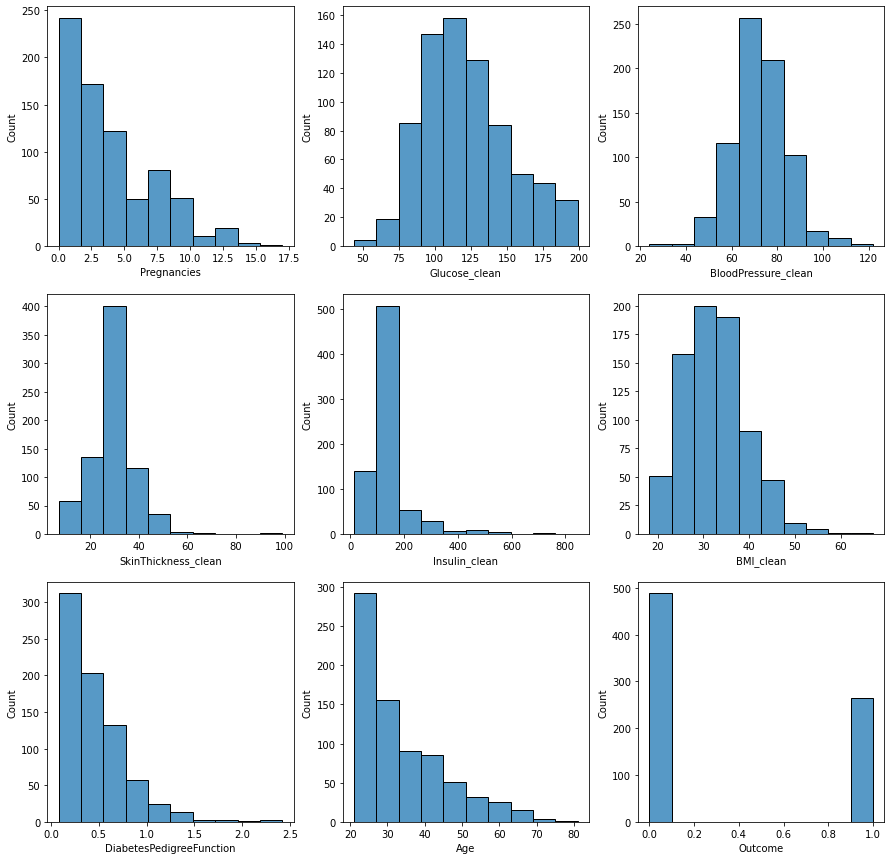

In [18]:

plot_histograms(diabetes_df_clean, ["Pregnancies", "Glucose_clean", "BloodPressure_clean", "SkinThickness_clean", "Insulin_clean", "BMI_clean", "DiabetesPedigreeFunction", "Age", "Outcome"])

#### Section 1.6 Section Summary
We have loaded the data into a dataframe and explored the metadata of the dataframe. We identified problematic data in the form of incorrect data types, missing values (NaN), outliers, as well as erroneous "0" values in columns that should not contain 0 values. 
We have cleaned the data by converting the data types to the correct types, removing rows with missing values, replacing erroneous "0 "values and outliers with the mean of the column. We have also plotted histograms of the data to visualise the distribution of the data.

We can now confidently answer our initial question: "Are there problems in the dataset that should be considered when using this dataset?" with a "No" that allows us to answer our important second question: "Is this dataset suitable for analysis of diabetes in patients?" with a confident "Yes", and with that we continue to section 2 where we will find which features could be useful in predicting diabetes in patients.


In [19]:
# We can now run all of the above functions to create a final dataframe that we will use in the next section.
# Load the data
diabetes_df_final = load_diabetes_data(display_metadata=False)
# Remove rows containing incorrect data types and null values
diabetes_df_final = conform_rows(diabetes_df_final, diabetes_df_final.columns)
# clean the outliers in the glucose column
diabetes_df_final = clean_outliers(df=diabetes_df_final)
# Fill mis coded "0" values with the mean of the column
diabetes_df_final = mean_fill(diabetes_df_final, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"], suffix=None)
# Display the metadata of the final dataframe
diabetes_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    float64
 2   BloodPressure             752 non-null    float64
 3   SkinThickness             752 non-null    float64
 4   Insulin                   752 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 58.8 KB


### Section 2: Preparing for Predictive Models
Now that we have cleaned our data we can explore if there are correlations in the data that would allow us to predict diabetes. We will first esblish the validity of each feature for incluson in a further model based on the variation inside the the independent variables (or features). For this we look at the histograms more closely. We will then consider how the features are related with each other and finally how they are related to the dependant variables. We will do this by creating a correlation matrix and a pairplot.


#### Section 2.1 Variability Analysis
In this section we want to start to answer the question: "Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?"
To do this we will inspect the variability and distribution of the independent variables with respect to the dependent variable "Outcome".
We can look at the histograms of the data split by outcome to get the first indication of how the Outcome and the indepentant variables are correlated.

In [20]:
# create a funtcion that displays the distribution of each column split by the Outcome column
def plot_histograms_outcome(df=diabetes_df_final, columns=diabetes_df_final.columns):
    """
    Plot histograms for the 9 columns in the dataframe split by the Outcome column
    Parameters:
    - df: The DataFrame to plot the histograms for.
    returns:
    - None, displays a 3 by 3 grid of histograms
    """
        
    # create the frame to hold the subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    # loop through the columns, plotting the histogram and use some clever math to place the axes object it in the correct subplot.
    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, bins=10, hue="Outcome", ax=axes[i // 3, i % 3])


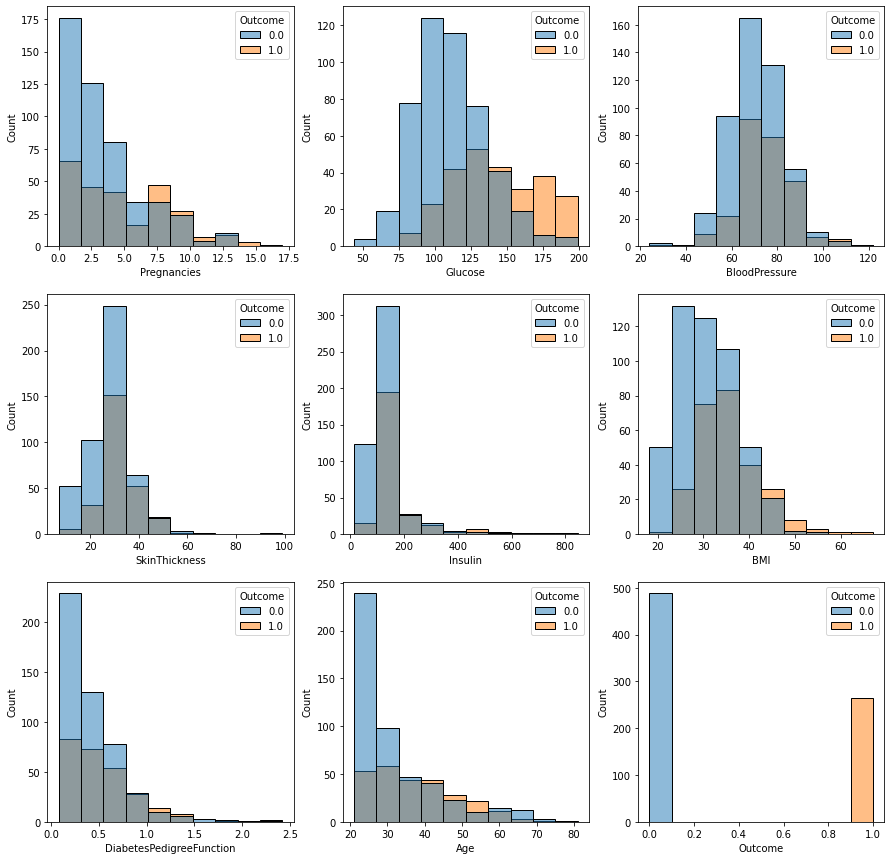

In [21]:
plot_histograms_outcome()

We see from the above that the data is weighted towards "0" outcome or patietns without diabetes. Nevertheless we see that there are potentially interesting differences in the distributions of the independent variables when split for the two outcomes. Especially Pregnancies, Gluclose and BMI seem to have over representation of Diabetes outcomes at higher values. 
We can start to be confident that we will have a positive answer for our questions: "Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?". We will look at this statistically using a correlation matrix to get further insight before concluding this section with a definitive answer.

#### Section 2.2 Correlation Analysis
We will run a correlation analysis to see how the variablity in one column is linked to the variablility of the other columns. We will pay special attention to the Outcome variable. We must be cautious with the results though as our dependent variable "Outcome" is a boolean and does not lead to perfect results in this case. Nevertheless it will provide us with insight into how we can find the variables to be used in a predictive model.

In [22]:
# We will create a function that displays a correlation matrix of the columns in the dataframe
def plot_correlation_matrix(df=diabetes_df_final, columns=diabetes_df_final.columns):
    """
    Plot a correlation matrix for the 9 columns in the dataframe
    Parameters:
    - df: The DataFrame to plot the correlation matrix for.
    returns:
    - None, displays a correlation matrix
    """
    # create the correlation matrix. We use peason correlation as we have a mix of continuous and categorical data
    corr = df[columns].corr(method ='pearson')
    # create a mask to hide the upper triangle of the matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # create the figure and axes
    fig, ax = plt.subplots(figsize=(11, 9))
    # create the colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # plot the heatmap
    #sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)

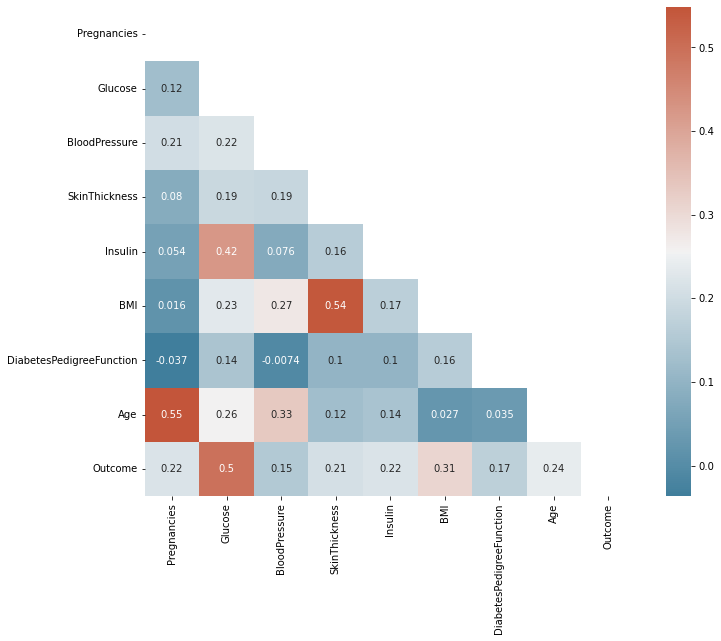

In [23]:
# Call the function
plot_correlation_matrix()

The correlation matrix shows us that Glucose and Outcome seem to have the highest correlation with each other. BloodPressure and DiabetesPedigreeFunction seem to have the lowest correlation with Outcome. SkinThickness and BMI also seem to have a high correlation with each other as well as Age and Pregnancies. 
The results show us that all of the independent variables have a covariance of above 0.2 except for the two lowest features just mentioned. for this reason we will include the 6 highest features in our further model.
We can conclude that there is 

#### Section 2.3 Section Summary
We have done visual and statisical analysis of the independent variables in respect to the dependent variable and found that there is highest correlation between the outcome and the following variables:
- Glucose
- BMI
- Age
- Pregnancies

In the final section we will create a model to predict the outcome based on these variables.

### Section 3 Baseline Predictive Model

In section one we gained trust in our data via the exploration and cleaning processes. In Section two we identified potential useful features for predicting Diabetes Outcomes using visual and statistical analysis. Now we will put our features into a simple predictive model to gain a first prediction that will be a baseline with witch to compare more complex future predictions.
We will use a Decision Tree Classifier as it is efficient to run and allows explainability of the resulting prediction weights. 
We will after running the model be able to answer our final question "How should we proceed with creating a predictive model?"

 




#### Section 3.1: Model Creation
We use the scikit-learn library in python to run the Decision Tree Classifier. We will look at the "Accuracy Score" and the "Confusion Report" to understand how many of the predictions our model gets right. Based on the performance we can decide how to continue.

In [24]:
# We will implement a simple decision tree classifier to predict the outcome of diabetes based on the other columns in the dataset. 
# We will use the scikit-learn library to implement the classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# We will create a function that takes a dataframe and a list of columns and returns a trained decision tree classifier
def train_decision_tree(df=diabetes_df_final, columns=diabetes_df_final.columns, target="Outcome", random_state=79):
    """
    Train a decision tree classifier on the given dataframe and columns

    Parameters:
    - df: The DataFrame to train the decision tree classifier on.
    - columns (list): A list of column names to train the decision tree classifier on including the target.
    - target (str): The name of the target column.
    - random_state (int): The random state to use for the train test split and the model for reproducibility.
    
    Returns:
    - model (sklearn.tree.DecisionTreeClassifier): A trained decision tree classifier.

    """
    # filter the dataframe to only include the columns we want to use
    X = df[columns].drop(target, axis=1)
    # put the target into a separate variable
    y = df[target]

    # create the test train split using the scikit learn function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # create the classifier object with a max depth of 6 to prevent overfitting
    DTC_model = DecisionTreeClassifier(max_depth=6, random_state=random_state)
    # fit the classifier to the data
    DTC_model.fit(X_train, y_train)
    # predict the outcome of the test data
    y_pred = DTC_model.predict(X_test)
    # print the classification report
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    # print the confusion matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    
    return DTC_model

In [25]:
# Now we will make predictions and evaluate the Decision Tree
model1 = train_decision_tree(df=diabetes_df_final, columns=["Glucose", "BMI", "Age", "Pregnancies", "Outcome"])

Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       144
         1.0       0.69      0.66      0.68        82

    accuracy                           0.77       226
   macro avg       0.75      0.75      0.75       226
weighted avg       0.77      0.77      0.77       226

Confusion Matrix
[[120  24]
 [ 28  54]]


#### Section 3.2 Discussion of Model Results
The Accuracy of the model is 0.77 which is not bad but in the case of our unequal weighted outcomes it is not really great. The confusion_matrix tell us that we had 120 True Negatives, meaning we we able to predict the "0" outcome of not having diabetes in 120 of 144 cases. There were 54 True Positives meaning we predicted the "1" outcome of having diabetes 54 of 82 times. There were 24 False Positives meaning we predicted the "1" outcome of having diabetes 24 of 144 times. Finally there were 28 False Negatives meaning we predicted the "0" outcome of not having diabetes 28 of 82 times. there were 24 false negatives and 28 false positives, meaning that we in general were better able to predict not having diabetes than having diabetes. This is likely due to the fact that there are more cases of not having diabetes in the dataset than having diabetes.
To answer our final question: "How should we proceed with creating a predictive model?", the reasonably good performance of the decision tree classifier points us to going into exploring a Random Forest Classifier as well as other classification models with the dataset that we have prepared.


#### Section 3.3 Conclusion
We have seen that through data exploration, cleaning and analysis we were able to get the dataset to a point where we gained trust in the contents and could convince ourselves that it was worth building a baseline predictive model. The dataset allowed us to create a reasonably good classification model using simple methods which leads us to the conclusion that further exploration of classification models would lead to better results, meaning that we would be better at predicting the case where patients have diabetes and where they do not.

This document was created to provide an insight into how an EDA can be completed using python and jupyter notebooks. The results of the model should not be used in practice to provide medical advice in any way.